### Linear regression with one variable

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [6]:
train_data = np.loadtxt("./ex1data1.txt", delimiter=",")


97


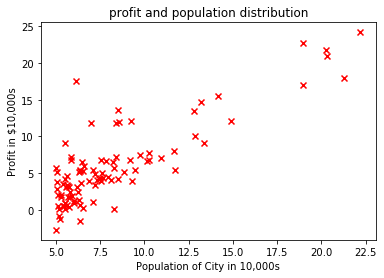

In [7]:
populations = train_data[:,0]
profits = train_data[:,1]
m = len(profits)
print(m)

fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('profit and population distribution')  
plt.xlabel('Population of City in 10,000s')   
plt.ylabel('Profit in $10,000s') 

plt.scatter(populations, profits, color='red', marker='x')

plt.show()

In [1]:
def hypothesis(X, theta):
    return np.matmul(X, theta)
  
def compute_loss(X, Y, theta):
    H = hypothesis(X, theta)
    return np.sum((H - Y)**2 / (2 * len(X)))
      
X = np.c_[np.ones(len(train_data)), train_data[:,0]]
Y = np.c_[train_data[:,1]]
theta = np.zeros([2, 1])
epoch = 1500
learning_rate = 0.001
losses = np.array([])
for i in range(epoch):
    losses = np.append(losses, compute_loss(X, Y, theta))
    H = hypothesis(X, theta)
    delta = learning_rate * (np.matmul((H - Y).T, X) / len(X))
    theta -= delta.T


NameError: name 'np' is not defined

In [9]:
predict1 = np.matmul([1, 3.5], theta);
print(predict1)
predict2 = np.matmul([1, 7], theta);
print(predict2)

[2.24676349]
[5.35573917]


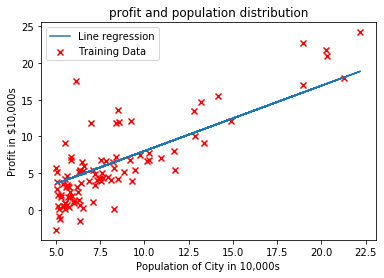

In [10]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('profit and population distribution')  
plt.xlabel('Population of City in 10,000s')   
plt.ylabel('Profit in $10,000s') 

plt.scatter(populations, profits, color='red', marker='x')
plt.plot(train_data[:,0], hypothesis(X, theta))
plt.legend(('Line regression','Training Data'), loc='best')

plt.show()

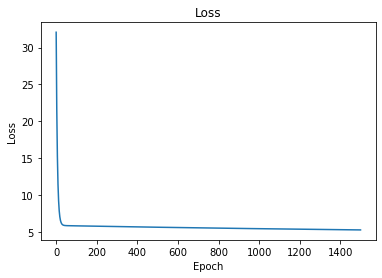

In [11]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Loss')  
plt.xlabel('Epoch')   
plt.ylabel('Loss') 

plt.plot(range(len(losses)), losses)

plt.show()

In [12]:
from mpl_toolkits.mplot3d import Axes3D

size = 100
theta0 = np.linspace(-10, 10, size)
theta1 = np.linspace(-1, 4, size)
losses = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]]).reshape((2, -1))
        loss = compute_loss(X, Y, t)
        losses[i, j] = np.sum(loss)

theta0, theta1 = np.meshgrid(theta0, theta1)


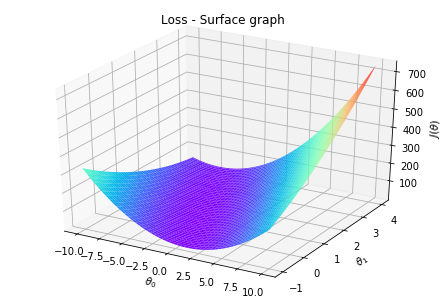

In [13]:
fig = plt.figure()  
ax = Axes3D(fig)

ax.set_title('Loss - Surface graph')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
ax.plot_surface(theta0, theta1, losses, cmap = plt.get_cmap('rainbow'))

plt.show()

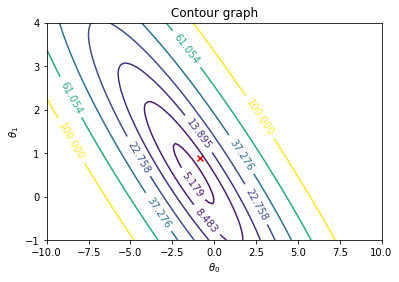

In [14]:
fig2 = plt.figure()  
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title('Contour graph')
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
contour = ax2.contour(theta0, theta1, losses, np.logspace(-1,2,15))
plt.clabel(contour, inline=1, fontsize=10)
# print(theta)
plt.scatter([theta[0,0]], [theta[1,0]], color='red', marker='x')

plt.show()

###  Linear regression with multiple variables

In [24]:
train_data = np.loadtxt("./ex1data2.txt", delimiter=",")
# print(train_data.shape)
X = train_data[:,:2]
Y = train_data[:,2:]
# print(np.mean(train_data, axis=0))
# print(np.std(train_data, axis=0))
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X - mean) / std
# X = (X - mean) / np.max(X)
# X /= np.max(X)
X = np.c_[np.ones(len(X)), X]
# print(X)
theta = np.zeros([X.shape[1], 1])
epoch = 1500
learning_rate = 0.01
losses = np.array([])
for i in range(epoch):
    losses = np.append(losses, compute_loss(X, Y, theta))
    H = hypothesis(X, theta)
    delta = learning_rate * (np.matmul((H - Y).T, X) / len(X))
    theta -= delta.T
print('Theta:', theta)

test_x = np.array([1650, 3]).reshape(1, 2)
test_x = (test_x - mean) / std
test_x = np.c_[np.ones(len(test_x)), test_x]
# print(test_x)
predict1 = np.matmul(test_x, theta)
print(predict1)

Theta: [[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]
[[293098.46667577]]


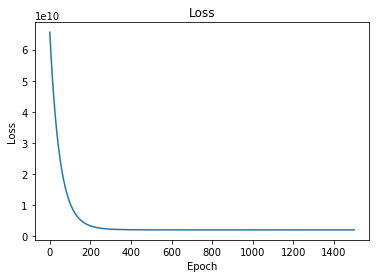

In [25]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Loss')  
plt.xlabel('Epoch')   
plt.ylabel('Loss') 

plt.plot(range(len(losses)), losses)

plt.show()

#### Normal Equations

In [17]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)
print('Theta:', theta)
predict1 = np.matmul(test_x, theta)
print(predict1)

Theta: [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
[[293081.46433489]]
